### Network Intrusion Individual Project

The Data: This data was obtained from Kaggle: (https://www.kaggle.com/nidhirastogi/network-intrusion-detection-using-python). For this dataset, TCP/IP dump data was acquired by simulating a typical US Air Force LAN. For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data. 

The Goal: The goal of this project is to be able to predict normal behavior on a network. 

In [1]:
# necessary imports

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import wrangle
import explore

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

### Acquire Takeaways
- Very clean data
- Only two columns are comprised of nulls: "num_outbound_cmds" and "is_host_login"
- 42 is a lot of columns, probably some that are not good predictors

In [2]:
# Acquire the data from the two csv files

df = wrangle.get_data()

In [3]:
# Get a feel for the data

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
# Quantify the train data

print("Dataset has {} rows & {} columns".format(df.shape[0],df.shape[1]))

Dataset has 25192 rows & 42 columns


In [5]:
# More detail - no null values in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [6]:
# Descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


## Data Prep

### Prep Takeaways
- I chose to limit outliers extremely conservatively because in this case the outliers ARE the story
- For the 'service' column, I dropped any service that had less than 400 occurances, as it still gave me plenty of anomalies
- I aggressively dropped rows that I deemed unnecessary
- Created dummies for all of the object-type columns

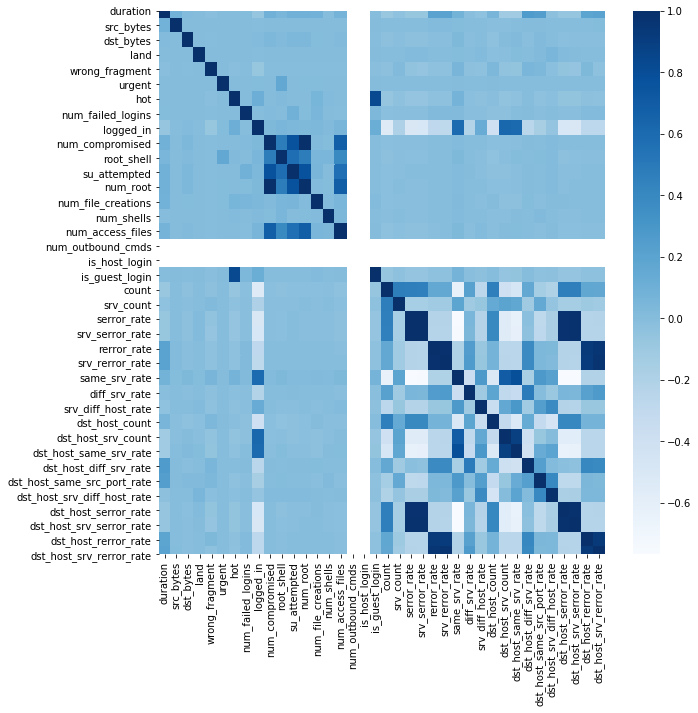

In [7]:
# Inspect correlation to determine columns to drop

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),cmap="Blues")

### Heatmap takeaways: 
- Most of the data has very low correlation
- Features that have high_correlation include: 

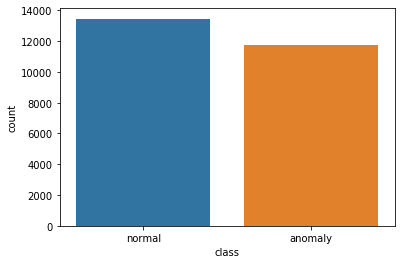

In [8]:
# Class Distribution

sns.countplot(df['class'])

- almost as many anomalies as normal transmissions

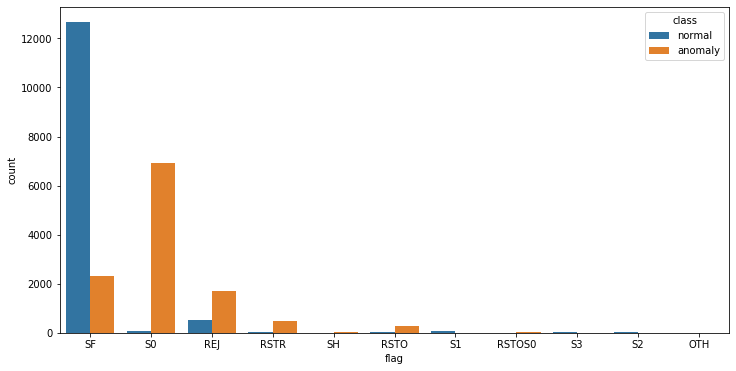

In [9]:
# Class according to flag type

plt.figure(figsize=(12,6))
sns.countplot(df['flag'], hue=df['class'])

- anomalies are predominately flagged as S0, to a lesser extent with RSTR, REJ, and RSTO
- normal transmissions are almost always flagged as SF

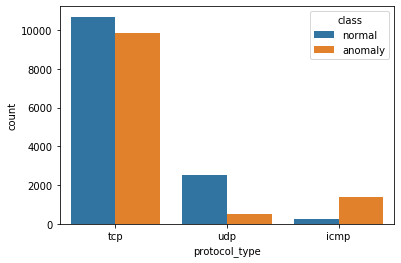

In [10]:
# Class and protocol_type

sns.countplot(df['protocol_type'], hue=df['class'])

- icmp has an abundance of anomalies
- tcp is almost evenly distributed

In [11]:
# Wrangle the data

df = wrangle.wrangle_nids(df)

In [12]:
# Look at the remaining columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
count,25192.0,84.591180,1.146735e+02,1.0,2.00,14.00,144.00,511.0
srv_count,25192.0,27.698754,7.246824e+01,1.0,2.00,8.00,18.00,511.0
same_srv_rate,25192.0,0.660559,4.396374e-01,0.0,0.09,1.00,1.00,1.0
diff_srv_rate,25192.0,0.062363,1.785500e-01,0.0,0.00,0.00,0.06,1.0
dst_host_count,25192.0,182.532074,9.899390e+01,0.0,84.00,255.00,255.00,255.0
dst_host_srv_count,25192.0,115.063036,1.106469e+02,0.0,10.00,61.00,255.00,255.0


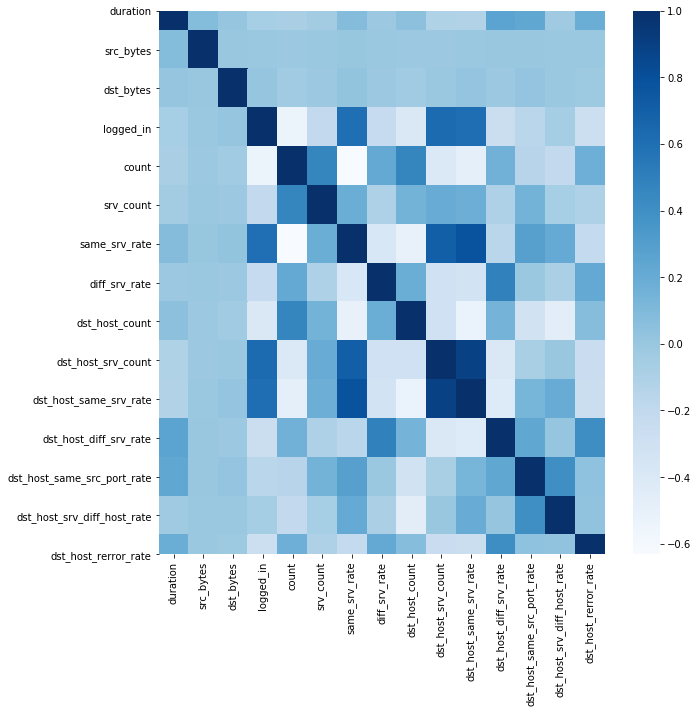

In [13]:
# Re-inspect correlation to determine additional columns to drop

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),cmap="Blues")

In [14]:
# Going to see if I want to shave the values down a bit

df['service'].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
pm_dump         3
red_i           3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [16]:
# Limiting service counts to above 400

df = df[df['service'].isin(counts[counts > 400].index)]

In [17]:
# Create dummy variables for protocol_type
dummy_df = pd.get_dummies(df['protocol_type'], drop_first=True)

# Merge data frames togeter
df = pd.concat([df, dummy_df], axis= 1)

# Drop "protocol_type" column
df.drop(columns=['protocol_type'], inplace=True)

In [18]:
# Create dummy variables for flag
dummy_df = pd.get_dummies(df['flag'], drop_first=True)

# Merge data frames togeter
df = pd.concat([df, dummy_df], axis= 1)

# Drop "flag" column
df.drop(columns=['flag'], inplace=True)

In [19]:
# Create dummy variables for service
dummy_df = pd.get_dummies(df['service'], drop_first=True)

# Merge data frames togeter
df = pd.concat([df, dummy_df], axis= 1)

# Drop "service" column
df.drop(columns=['service'], inplace=True)

In [20]:
# Create dummy variables for class
dummy_df = pd.get_dummies(df['class'], drop_first=True)

# Rename dummy cols
dummy_df.columns = ['is_normal']

# Merge data frames togeter
df = pd.concat([df, dummy_df], axis= 1)

# Drop "Residence_type" column
df.drop(columns=['class'], inplace=True)

In [21]:
# Check my data now that I have new columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,19882.0,353.370536,2.877925e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,19882.0,29568.652148,2.712388e+06,0.0,0.00,187.00,305.00,381709090.0
dst_bytes,19882.0,4128.269138,9.883527e+04,0.0,0.00,105.00,1010.00,5151385.0
logged_in,19882.0,0.482949,4.997218e-01,0.0,0.00,0.00,1.00,1.0
count,19882.0,63.750176,1.094251e+02,1.0,2.00,8.00,88.00,511.0
srv_count,19882.0,32.509556,8.080041e+01,1.0,2.00,7.00,18.00,511.0
same_srv_rate,19882.0,0.784615,3.828047e-01,0.0,0.97,1.00,1.00,1.0
diff_srv_rate,19882.0,0.055242,1.824477e-01,0.0,0.00,0.00,0.03,1.0
dst_host_count,19882.0,167.222613,1.029684e+02,0.0,54.00,255.00,255.00,255.0
dst_host_srv_count,19882.0,142.227341,1.093294e+02,0.0,17.00,161.00,255.00,255.0


## Data Exploration

In [22]:
# Identifying my quantitative columns, my categorical columns, and my target variable

quant_vars = ['dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'src_bytes']
quant_cols = ['dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'src_bytes']
cat_cols = ['tcp', 'other', 'logged_in']
cat_vars = ['tcp', 'other', 'logged_in']
target = 'is_normal'

In [23]:
train, validate, test = wrangle.split(df, target, 123)

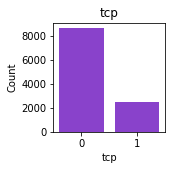

   tcp  Count  Percent
1    0   8619    77.42
0    1   2514    22.58
_________________________________________________________________


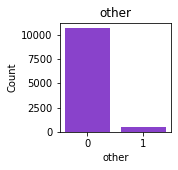

   other  Count  Percent
0      0  10660    95.75
1      1    473     4.25
_________________________________________________________________


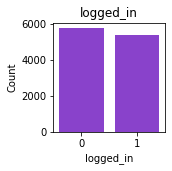

   logged_in  Count  Percent
0          0   5752    51.67
1          1   5381    48.33
_________________________________________________________________


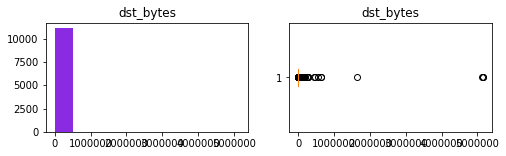

count    1.113300e+04
mean     3.831606e+03
std      8.705259e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.020000e+02
75%      1.035000e+03
max      5.151385e+06
Name: dst_bytes, dtype: float64


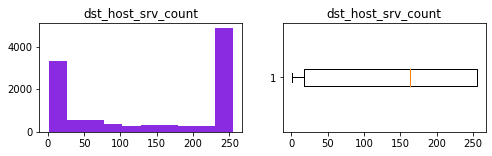

count    11133.000000
mean       142.584389
std        109.445291
min          1.000000
25%         17.000000
50%        163.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64


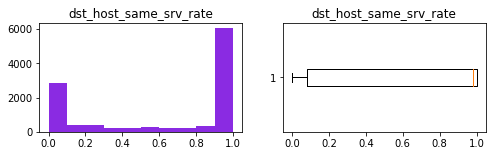

count    11133.000000
mean         0.641847
std          0.427666
min          0.000000
25%          0.080000
50%          0.980000
75%          1.000000
max          1.000000
Name: dst_host_same_srv_rate, dtype: float64


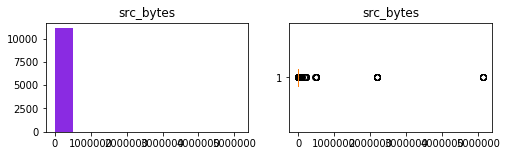

count    1.113300e+04
mean     8.665717e+03
std      1.629364e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.860000e+02
75%      3.050000e+02
max      5.135678e+06
Name: src_bytes, dtype: float64


In [24]:
# Using Maggie's explore function for univariate exploration

explore.explore_univariate(train, cat_cols, quant_cols)

## Univariate takeaways
- The most frequent protocol_type is 'tcp'
- The two leading services are 'ftp_data' and 'other'
- Some extreme outliers in 'dst_bytes' and 'src_bytes'
- 'logged_in' doesn't seem to make much difference

In [25]:
# Seperate my target from the rest of the data

X_train = train.drop(columns=['is_normal'])
y_train = train['is_normal']

X_validate = validate.drop(columns=['is_normal'])
y_validate = validate['is_normal']

X_test = test.drop(columns=['is_normal'])
y_test = test['is_normal']

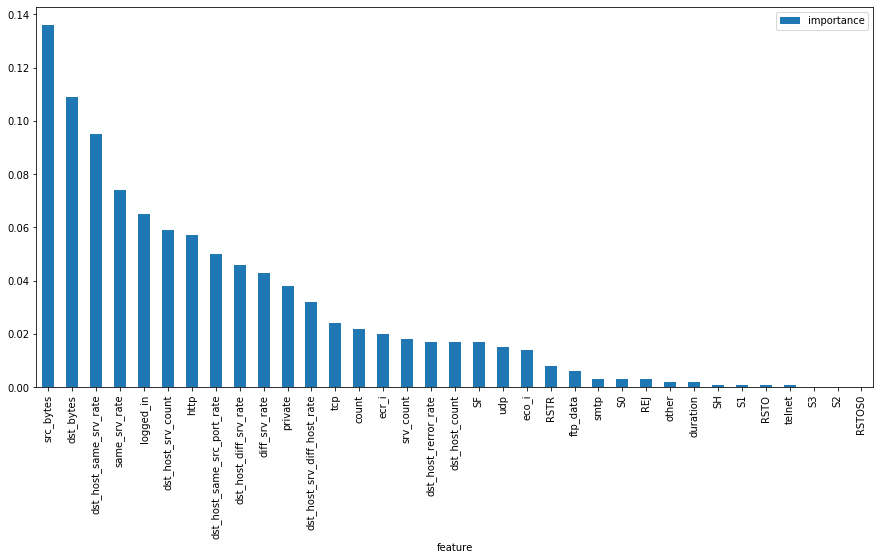

In [26]:
# Identify important features with Random Forest Classifier

rfc = RandomForestClassifier();

# Fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# Isolate important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# Plot importances
plt.rcParams['figure.figsize'] = (15, 7)
importances.plot.bar();

# Modeling

In [27]:
# Set my baseline accuracy

train.is_normal.value_counts(normalize=True)

1    0.645289
0    0.354711
Name: is_normal, dtype: float64

In [28]:
# Establish new column that contains the mode

train["most_frequent"] = 1

# Calcuate the baseline accuracy
baseline_accuracy = (train.is_normal == train.most_frequent).mean()
print(f'My baseline prediction is_normal = 1')
print(f'My baseline accuracy is: {baseline_accuracy:.3%}')

My baseline prediction is_normal = 1
My baseline accuracy is: 64.529%


### Model 1: Logistic Regression

In [29]:
# Create a Logistic Regression model.

logit1 = LogisticRegression(random_state=123)

In [30]:
# Fit the model

logit1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Print classification report for Logit1 train.

print(classification_report(y_true=train.is_normal, y_pred=logit1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3949
           1       0.97      0.98      0.98      7184

    accuracy                           0.97     11133
   macro avg       0.97      0.96      0.97     11133
weighted avg       0.97      0.97      0.97     11133



In [32]:
# Print classification report for Logit1 validate.

print(classification_report(y_true=validate.is_normal, y_pred=logit1.predict(X_validate)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1692
           1       0.97      0.98      0.97      3080

    accuracy                           0.97      4772
   macro avg       0.97      0.96      0.96      4772
weighted avg       0.97      0.97      0.97      4772



#### Model 1 Takeaway
- Using all of the features, my model performed with 97% accuracy and 98% recall on both train and validate
- Beat my baseline

### Model 2: Logistic Regression 

In [33]:
# Tweaking my features

features2 = ['dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'src_bytes', 'tcp', 'other', 'logged_in']

In [34]:
X_train = train[features2]
y_train = train[['is_normal']]

X_validate = validate[features2]
y_validate = validate[['is_normal']]

X_test = test[features2]
y_test = test[['is_normal']]

In [35]:
logit2 = LogisticRegression(random_state=123)
logit2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Print classification report for Logit2 train.

print(classification_report(y_true=train.is_normal, y_pred=logit2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3949
           1       0.92      0.90      0.91      7184

    accuracy                           0.88     11133
   macro avg       0.87      0.88      0.87     11133
weighted avg       0.89      0.88      0.88     11133



In [37]:
# Print classification report for Logit2 validate.

print(classification_report(y_true=validate.is_normal, y_pred=logit2.predict(X_validate)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1692
           1       0.92      0.90      0.91      3080

    accuracy                           0.89      4772
   macro avg       0.87      0.88      0.88      4772
weighted avg       0.89      0.89      0.89      4772



#### Model 2 Takeaway
- Limiting the features, my model performed with 88% accuracy and 90% recall on both train and validate
- Beat my baseline

#### Model 3 Random Forest

In [38]:
# Tweaking my features again, included some of the flags

features3 = ['dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'src_bytes', 'tcp', 'other', 'logged_in', 'SF', 'S0']

In [39]:
# Adjusted the train, validate, and test to the tweaked features

X_train = train[features3]
y_train = train[['is_normal']]

X_validate = validate[features3]
y_validate = validate[['is_normal']]

X_test = test[features3]
y_test = test[['is_normal']]

In [40]:
# Generate a Random Forest model with the max_depth argument is set to 4

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=4, 
                            random_state=123)

In [41]:
# Fit the model on the training data 

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [42]:
# Evaluate the weight of each feature.

print(rf.feature_importances_)

[0.24073326 0.11465955 0.05430301 0.34349631 0.03534509 0.00113698
 0.05802513 0.1418934  0.01040726]


In [43]:
# Make my prediction and estimate probability for Random Forest Train

y_pred_rf = rf.predict(X_train)
y_pred_proba_rf = rf.predict_proba(X_train)

In [44]:
# Print classification report

print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3949
           1       0.99      0.99      0.99      7184

    accuracy                           0.98     11133
   macro avg       0.98      0.98      0.98     11133
weighted avg       0.98      0.98      0.98     11133



In [45]:
# Make my prediction and estimate probability for Random Forest Validate

y_pred_rf_val = rf.predict(X_validate)
y_pred_proba_rf_val = rf.predict_proba(X_validate)

In [46]:
# Print my validation classification report

print(classification_report(y_validate, y_pred_rf_val))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1692
           1       0.98      0.99      0.99      3080

    accuracy                           0.98      4772
   macro avg       0.98      0.98      0.98      4772
weighted avg       0.98      0.98      0.98      4772



#### Model 3 Takeaways
- 97% accuracy and 99% recall 
- Beat my baseline

### Model 4 Decision Tree

In [47]:
# Generate a Decision Tree model with the max_depth argument is set to 5

clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [48]:
# Slightly tweaked my features, removing 'logged_in' 'SO' and 'src_bytes'

features4 = ['dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'tcp', 'other', 'SF', 'S0']

In [49]:
# Adjusted the train, validate, and test to the tweaked features

X_train = train[features4]
y_train = train[['is_normal']]

X_validate = validate[features4]
y_validate = validate[['is_normal']]

X_test = test[features4]
y_test = test[['is_normal']]

In [50]:
# Fit the model on the training data

clf = clf.fit(X_train, y_train)

In [51]:
# Generate a set of predictions using this trained model

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 1, 1, 0], dtype=uint8)

In [52]:
# Estimate the probabilities for each class

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.90938865, 0.09061135],
       [0.90938865, 0.09061135],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99036145, 0.00963855]])

In [53]:
# Evaluate the model 

print('Accuracy of Decision Tree classifier on training set: {:.4f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.9718


In [54]:
# Print a classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3949
           1       0.98      0.98      0.98      7184

    accuracy                           0.97     11133
   macro avg       0.97      0.97      0.97     11133
weighted avg       0.97      0.97      0.97     11133



In [55]:
# Evaluate this model on out-of-sample data

print('Accuracy of Decision Tree classifier on validate set: {:.4f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.9709


In [56]:
# Use the classification model trained on train data to make predictions on validate data

y_pred_val = clf.predict(X_validate)

In [57]:
# Compare actual y values from validate to predictions based on X_validate

print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1692
           1       0.98      0.98      0.98      3080

    accuracy                           0.97      4772
   macro avg       0.97      0.97      0.97      4772
weighted avg       0.97      0.97      0.97      4772



#### Model 4 Takeaways
- 97% accuracy and 98% recall on both train and validate
- Beat my baseline

### Choose a model to test

- All of my models beat my baseline handily
- All of my models hovered between the high 80s and the 90s for both accuracy and recall
- LR Model 1 seemed to be the best predictor, so we'll go with that one for the test

In [58]:
# Fit the model

logit1.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# Make sure the test data proportions look correct

print(X_test.shape, y_test.shape)

(3977, 7) (3977, 1)


In [60]:
# Classification report  

print(classification_report(y_true=y_test, y_pred=logit1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1411
           1       0.92      0.95      0.94      2566

    accuracy                           0.92      3977
   macro avg       0.91      0.90      0.91      3977
weighted avg       0.92      0.92      0.92      3977



### Testing Takeaways
- The test LR model was a little over-fit: test data dropped off by 3% on recall and dropped by 5% on accuracy
- 95% recall and 92% accuracy are respectable numbers, so not terrible overall 